# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from bs4 import BeautifulSoup

In [3]:
import requests

# Creating the dataset

## Loading the page

In [4]:
link= "https://www.theworlds50best.com/list/1-50-winners#t1-50"

In [5]:
page = requests.get(link).text

In [7]:
#print(page)

## Scraping the page using BeautifulSoup

In [6]:
soup = BeautifulSoup(page,"lxml")

In [9]:
#print(soup.prettify())

In [7]:
table = soup.find("div",class_="tl c-12 nm")

In [12]:
#table.find("h3").text

In [8]:
name_table=table.find_all("h2")

In [14]:
#name_table

In [9]:
restaurant_names = []

for i in range(len(name_table)):
    name = name_table[i].text
    restaurant_names.append(name)

In [16]:
#restaurant_names

In [10]:
location_table=table.find_all("h3")

In [11]:
loc = []

for i in range(len(location_table)):
    name = location_table[i].text
    loc.append(name)

In [12]:
city=[]

for i in range(len(loc)):
    city.append(loc[i].split(',')[0])
    #country.append(loc[i].split(',')[1])
    i=i+1

In [20]:
len(loc)

50

In [13]:
country=[]

for i in range(len(loc)):
    #print(i)
    #print(loc[i].split(',')[1])
    
    try: 
    #len(loc[i].split(',')[1])!=0:
        country.append(loc[i].split(',')[1])
        i=i+1
    except:
        country.append(loc[i].split(',')[0])

In [14]:
country_new=[]

for c in country:
    if c[0]==" ":
        country_new.append(c.strip())
    else:
        country_new.append(c)

## Creating dataframe

In [15]:
df1=pd.DataFrame({"Name":restaurant_names,"City":city,"Country":country_new})

In [16]:
col_names = [df1.columns[-1],df1.columns[0],df1.columns[1]]

In [17]:
df1=df1[col_names]

In [18]:
# have to change Ultraviolet by Paul Pairet to Ultraviolet, so the michelin stars info is assigned properly
df1["Name"][23]="Ultraviolet"

In [19]:
df1.head()

,Name,City,Country
0,Osteria Francescana,Modena,Italy
1,El Celler de Can Roca,Girona,Spain
2,Mirazur,Menton,France
3,Eleven Madison Park,New York,USA
4,Gaggan,Bangkok,Thailand


# Foursquare API

In [20]:
# The code was removed by Watson Studio for sharing.

## Getting location, ID and category information

In [21]:
restaurant_names_search=restaurant_names.copy()
r_n_new=[]
for i  in range(len(restaurant_names_search)):
    r_n_new.append(restaurant_names_search[i].replace(" ","-"))

In [22]:
city_names_search=city.copy()
city_n_new=[]
for i  in range(len(city_names_search)):
    city_n_new.append(city_names_search[i].replace(" ","-"))

In [23]:
country_names_search=country_new.copy()
country_n_new=[]
for i  in range(len(country_names_search)):
    country_n_new.append(country_names_search[i].replace(" ","-"))

In [24]:
latitude = []
longitude = []
category=[]
id_fsq=[]
name_fsq=[]

for name, locat, state in zip(r_n_new,city_n_new,country_n_new):
    url = "https://api.foursquare.com/v2/venues/search?query={}&near={},{}&client_id={}&client_secret={}&v={}".format(name,locat,state,client_id,client_secret,version)
    

    results = requests.get(url).json()["response"]["venues"][0]
    
    latitude.append(results["location"]["lat"])
    
    longitude.append(results["location"]["lng"])
    
    id_fsq.append(results["id"])
    
    name_fsq.append(results["name"])
    
    
    
    
    try:
        category.append(results["categories"][0]["name"])
    except:
        category.append("not available")

In [25]:
df1["Category"]=pd.Series(category)
df1["Lat"]=pd.Series(latitude)
df1["Lng"]=pd.Series(longitude)
df1["ID_fsq"]=pd.Series(id_fsq)
df1["Name_fsq"]=pd.Series(name_fsq)

In [26]:
df1.head()

,Name,City,Country,Category,Lat,Lng,ID_fsq,Name_fsq
0,Osteria Francescana,Modena,Italy,Italian Restaurant,44.644767,10.921629,4c97e0611302b60c90abb1a0,Osteria Francescana
1,El Celler de Can Roca,Girona,Spain,Mediterranean Restaurant,41.993311,2.808079,4b7ff0dbf964a520c94530e3,El Celler de Can Roca
2,Mirazur,Menton,France,French Restaurant,43.785881,7.527904,4bc5afac69369521a5548488,Mirazur
3,Eleven Madison Park,New York,USA,New American Restaurant,40.741648,-73.987148,457ebeaaf964a5203f3f1fe3,Eleven Madison Park
4,Gaggan,Bangkok,Thailand,Indian Restaurant,13.737694,100.542232,4cdbd566df986ea8ac62cc16,Gaggan (กากั้น)


##### some restaurants were not matched correctly, as the data set is small I decided to correct the data manually

In [27]:
df1["Category"][5]="Peruvian Restaurant"
df1["ID_fsq"][5]="4ca55f1514c3370429e1b53b"
df1["Name_fsq"][5]="Restaurante Central"

df1["ID_fsq"][8]="4c0955db340720a1809d8493"
df1["Category"][8]="Molecular Gastronomy Restaurant"

df1["Category"][16]="Japanese  Restaurant"
df1["ID_fsq"][16]="4d95cbe7daec224bd65a063e"
df1["Name_fsq"][16]="表参道ワイン食堂 Den"

df1["Category"][39]="French Restaurant"
df1["ID_fsq"][39]="4dc1490a22713750ba78c198"
df1["Name_fsq"][39]="Septime"

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/env

In [28]:
df1.head()

,Name,City,Country,Category,Lat,Lng,ID_fsq,Name_fsq
0,Osteria Francescana,Modena,Italy,Italian Restaurant,44.644767,10.921629,4c97e0611302b60c90abb1a0,Osteria Francescana
1,El Celler de Can Roca,Girona,Spain,Mediterranean Restaurant,41.993311,2.808079,4b7ff0dbf964a520c94530e3,El Celler de Can Roca
2,Mirazur,Menton,France,French Restaurant,43.785881,7.527904,4bc5afac69369521a5548488,Mirazur
3,Eleven Madison Park,New York,USA,New American Restaurant,40.741648,-73.987148,457ebeaaf964a5203f3f1fe3,Eleven Madison Park
4,Gaggan,Bangkok,Thailand,Indian Restaurant,13.737694,100.542232,4cdbd566df986ea8ac62cc16,Gaggan (กากั้น)


## Getting price and rating information

In [29]:
price_category=[]
price_tier=[]
rating=[]

for ids in list(df1["ID_fsq"]):
    url="https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}".format(ids,client_id,client_secret,version)
    results = requests.get(url).json()["response"]["venue"]
    
    try:
        price_category.append(results["price"]["message"])
    except:
        price_category.append("not available")
        
    try:
        price_tier.append(results["price"]["tier"])
    except:
         price_tier.append(0)
    
    try:
        rating.append(results["rating"])
    except:
        rating.append("not available")

In [30]:
df1["Price_Category"]=pd.Series(price_category)
df1["Price_Tier"]=pd.Series(price_tier)
df1["Rating"]=pd.Series(rating)

In [31]:
df1.head()

,Name,City,Country,Category,Lat,Lng,ID_fsq,Name_fsq,Price_Category,Price_Tier,Rating
0,Osteria Francescana,Modena,Italy,Italian Restaurant,44.644767,10.921629,4c97e0611302b60c90abb1a0,Osteria Francescana,Expensive,3,9.3
1,El Celler de Can Roca,Girona,Spain,Mediterranean Restaurant,41.993311,2.808079,4b7ff0dbf964a520c94530e3,El Celler de Can Roca,Very Expensive,4,9.4
2,Mirazur,Menton,France,French Restaurant,43.785881,7.527904,4bc5afac69369521a5548488,Mirazur,Expensive,3,8.8
3,Eleven Madison Park,New York,USA,New American Restaurant,40.741648,-73.987148,457ebeaaf964a5203f3f1fe3,Eleven Madison Park,Very Expensive,4,9.3
4,Gaggan,Bangkok,Thailand,Indian Restaurant,13.737694,100.542232,4cdbd566df986ea8ac62cc16,Gaggan (กากั้น),Expensive,3,8.8


# 3 Michelin stars

#### only found list of 3 stars restaurants, will be analyzing only two options (has 3 stars or not)

In [32]:
df1["Has 3 Michelin stars"]=pd.Series(np.nan)

In [33]:
link_michelin = "https://en.wikipedia.org/wiki/List_of_Michelin_3-star_restaurants"

In [34]:
michelin_3=requests.get(link_michelin).text

In [35]:
michelin_soup = BeautifulSoup(michelin_3,"lxml")

In [67]:
#print(michelin_soup.prettify())

In [36]:
table_m=michelin_soup.find_all("tbody")

In [69]:
#table_m[0].td.text

In [37]:
table_2=michelin_soup.find_all("tr")

In [38]:
michelin_stars=[]

for i in range(len(table_2)):
    t=table_2[i].find_all("td")
    
    for j in range(len(t)):
        michelin_stars.append(t[j].text)

In [72]:
#michelin_stars

In [39]:
for i in range(len(df1)):
    if df1["Name"][i] in michelin_stars:
        df1["Has 3 Michelin stars"][i]="1"
        i=i+1
    else:
        df1["Has 3 Michelin stars"][i]="0"
        i=i+1

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
df1.head()

,Name,City,Country,Category,Lat,Lng,ID_fsq,Name_fsq,Price_Category,Price_Tier,Rating,Has 3 Michelin stars
0,Osteria Francescana,Modena,Italy,Italian Restaurant,44.644767,10.921629,4c97e0611302b60c90abb1a0,Osteria Francescana,Expensive,3,9.3,1.0
1,El Celler de Can Roca,Girona,Spain,Mediterranean Restaurant,41.993311,2.808079,4b7ff0dbf964a520c94530e3,El Celler de Can Roca,Very Expensive,4,9.4,1.0
2,Mirazur,Menton,France,French Restaurant,43.785881,7.527904,4bc5afac69369521a5548488,Mirazur,Expensive,3,8.8,0.0
3,Eleven Madison Park,New York,USA,New American Restaurant,40.741648,-73.987148,457ebeaaf964a5203f3f1fe3,Eleven Madison Park,Very Expensive,4,9.3,1.0
4,Gaggan,Bangkok,Thailand,Indian Restaurant,13.737694,100.542232,4cdbd566df986ea8ac62cc16,Gaggan (กากั้น),Expensive,3,8.8,0.0


# Exploratory analysis

In [41]:
df1["City"].value_counts()

London              4
Paris               4
Lima                3
New York            3
Tokyo               3
Bangkok             2
Barcelona           2
San Sebastian       2
Mexico City         2
Chicago             1
Cape Town           1
Kobarid             1
Oslo                1
Santiago            1
Melbourne           1
Menton              1
Girona              1
Istanbul            1
Vienna              1
Pocantico Hills     1
Shanghai            1
Axpe                1
São Paulo           1
Singapore           1
San Francisco       1
Castel di Sangro    1
Larrabetzu          1
Moscow              1
Berlin              1
Rubano              1
Fürstenau           1
Alba                1
Copenhagen          1
Modena              1
Name: City, dtype: int64

In [42]:
df1["Country"].value_counts()

Spain           7
USA             6
France          5
UK              4
Italy           4
Peru            3
Japan           3
Mexico          2
Thailand        2
Australia       1
Norway          1
Switzerland     1
Germany         1
Denmark         1
Singapore       1
South Africa    1
Russia          1
Slovenia        1
Chile           1
Brazil          1
Turkey          1
Austria         1
China           1
Name: Country, dtype: int64

In [43]:
print("The country with the most restaurants in the top 50 list is {} with {} venues.".format(df1["Country"].value_counts().index[0],df1["Country"].value_counts()[0]))

The country with the most restaurants in the top 50 list is Spain with 7 venues.


In [44]:
df1["Category"].value_counts()

French Restaurant                  7
Molecular Gastronomy Restaurant    6
Restaurant                         6
Italian Restaurant                 4
New American Restaurant            3
Mexican Restaurant                 3
Japanese Restaurant                2
Scandinavian Restaurant            2
Spanish Restaurant                 2
Peruvian Restaurant                2
English Restaurant                 1
Austrian Restaurant                1
Mediterranean Restaurant           1
Tapas Restaurant                   1
Brazilian Restaurant               1
Kaiseki Restaurant                 1
Russian Restaurant                 1
Thai Restaurant                    1
Vegetarian / Vegan Restaurant      1
Eastern European Restaurant        1
Modern European Restaurant         1
Japanese  Restaurant               1
Indian Restaurant                  1
Name: Category, dtype: int64

In [45]:
print("The three most popular categories are {} with {} restaurants, {} with {} restaurants and {} with {} restaurants.".format(df1["Category"].value_counts().index[0], 
                                                                                                                                df1["Category"].value_counts()[0], 
                                                                                                                                df1["Category"].value_counts().index[1],
                                                                                                                                df1["Category"].value_counts()[1],
                                                                                                                                df1["Category"].value_counts().index[2],
                                                                                                                                df1["Category"].value_counts()[2]))
                                      

The three most popular categories are French Restaurant with 7 restaurants, Molecular Gastronomy Restaurant with 6 restaurants and Restaurant with 6 restaurants.


In [46]:
df1["Price_Category"].value_counts()

Very Expensive    24
Expensive         15
Moderate           9
not available      1
Cheap              1
Name: Price_Category, dtype: int64

In [47]:
df1["Price_Tier"].value_counts()

4    24
3    15
2     9
1     1
0     1
Name: Price_Tier, dtype: int64

In [48]:
print("The average price_tier of all 50 restaurants is {}.".format(df1["Price_Tier"].mean()))

The average price_tier of all 50 restaurants is 3.2.


In [49]:
df1["Rating"].value_counts().sort_index(ascending=False)

9.6    1
9.4    3
9.3    7
9.2    6
9.1    8
9.0    5
8.9    1
8.8    7
8.7    3
8.6    1
8.5    1
8.2    2
8.1    3
8.0    1
7.6    1
Name: Rating, dtype: int64

In [50]:
print("The restaurant with the best rating is {} with the rating {}.".format(df1["Name"][df1["Rating"]==9.6].values[0],df1[df1["Name"]=="Hiša Franko"]["Rating"].values[0]))

The restaurant with the best rating is Hiša Franko with the rating 9.6.


In [51]:
print("The average rating of all 50 restaurants is {}.".format(df1["Rating"].mean()))

The average rating of all 50 restaurants is 8.918000000000001.


In [52]:
df1["Has 3 Michelin stars"].value_counts()

0.0    32
1.0    18
Name: Has 3 Michelin stars, dtype: int64

In [53]:
print("Out of all 50 top restaurants, {} have 3 stars.".format(df1["Has 3 Michelin stars"].value_counts()[1]))

Out of all 50 top restaurants, 18 have 3 stars.


# Graphs

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


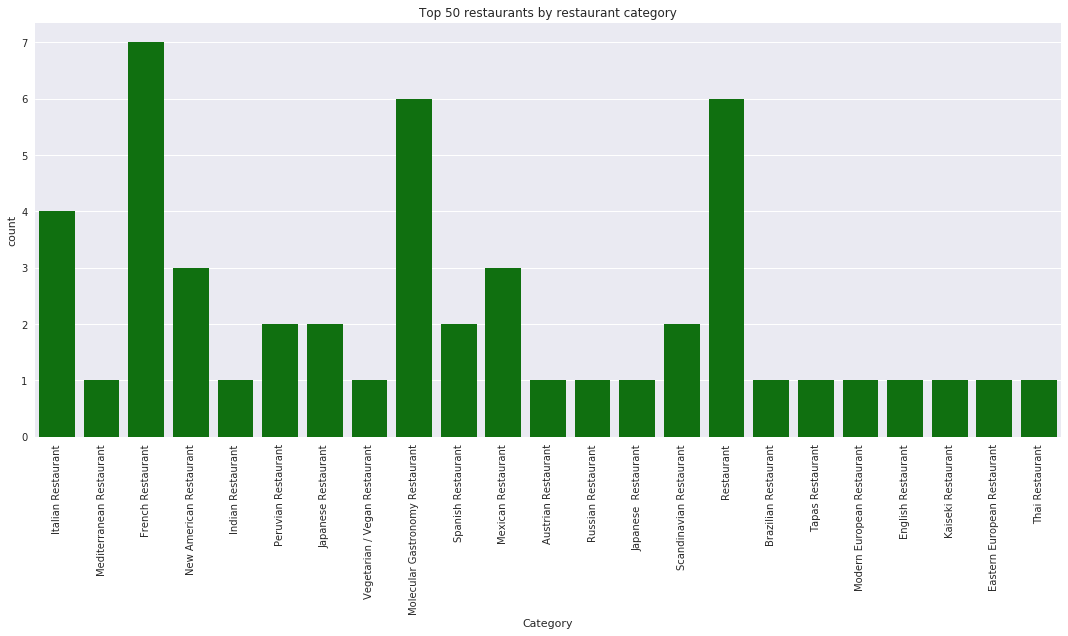

In [78]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="Category",data=df1,color="green")
plt.xticks(rotation=90)
fig.set_size_inches(15, 9)
plt.title("Top 50 restaurants by restaurant category")
plt.tight_layout()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


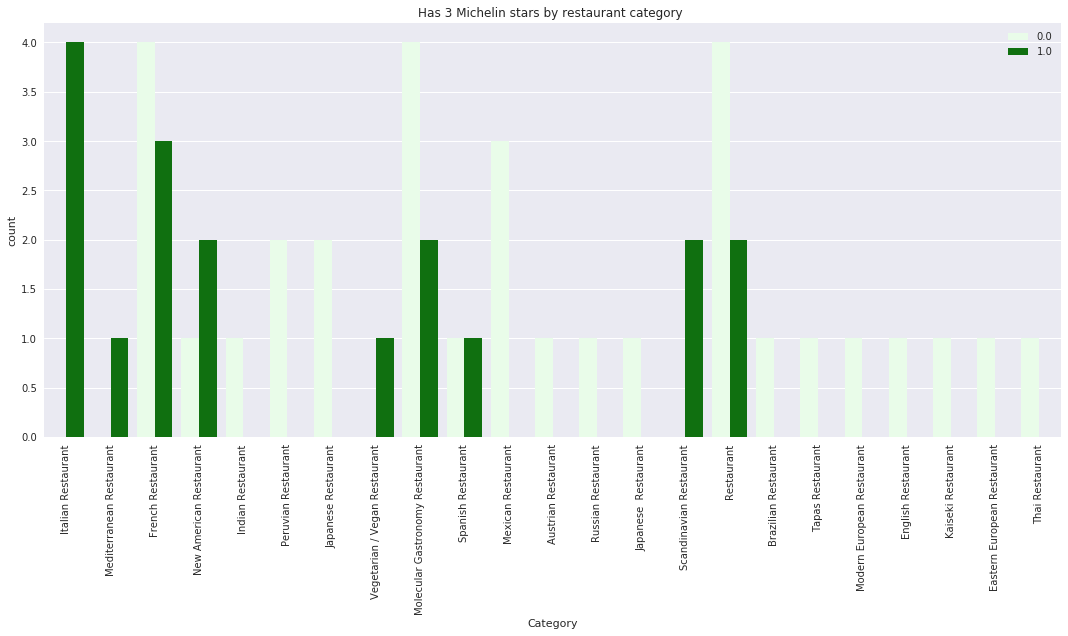

In [79]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="Category",data=df1,color="green",hue="Has 3 Michelin stars")
plt.xticks(rotation=90)
fig.set_size_inches(15, 9)
plt.title("Has 3 Michelin stars by restaurant category ")
plt.legend(loc='upper right')
plt.tight_layout()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


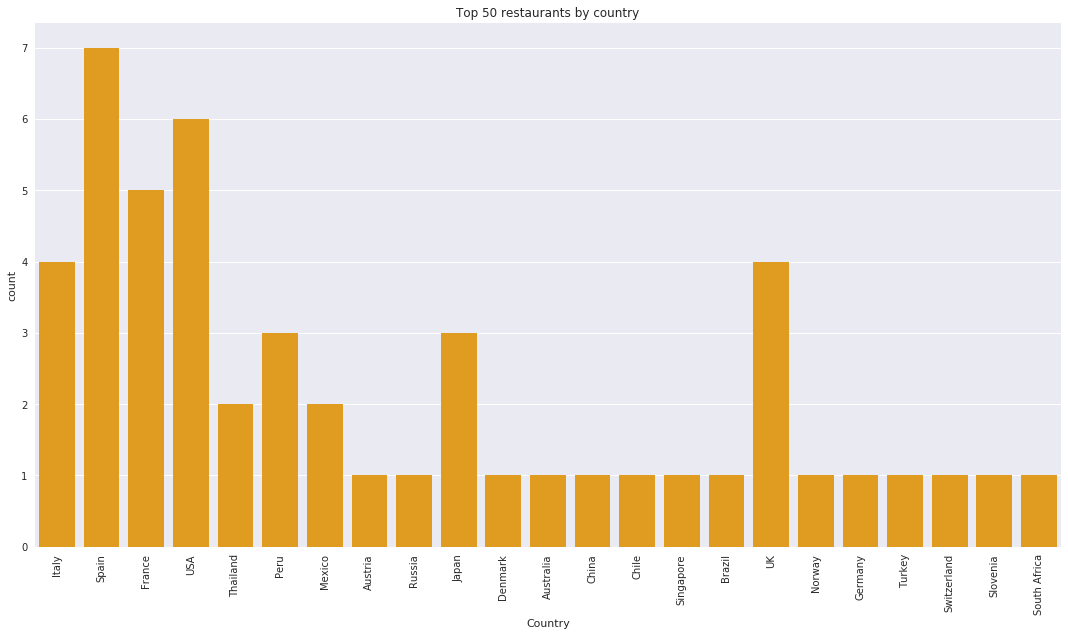

In [80]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="Country",data=df1,color="orange")
plt.xticks(rotation=90)
fig.set_size_inches(15, 9)
plt.title("Top 50 restaurants by country")
plt.tight_layout()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


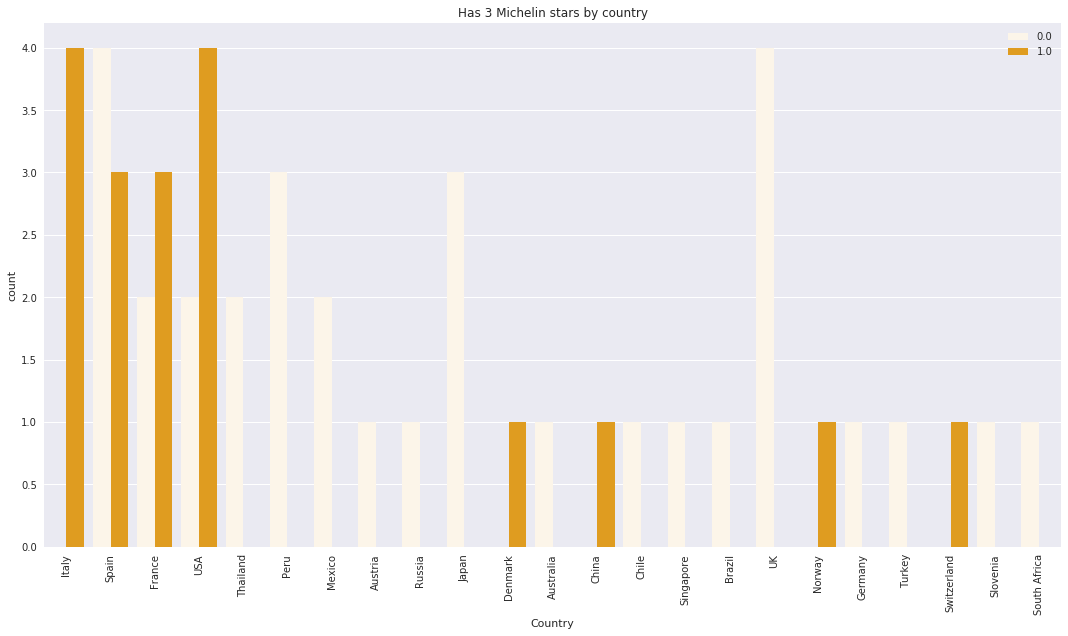

In [81]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="Country",data=df1,color="orange",hue="Has 3 Michelin stars")
plt.xticks(rotation=90)
fig.set_size_inches(15, 9)
plt.legend(loc='upper right')
plt.title("Has 3 Michelin stars by country")
plt.tight_layout()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


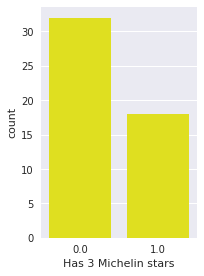

In [82]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="Has 3 Michelin stars",data=df1,color="yellow")
#plt.xticks(rotation=90)
fig.set_size_inches(3,4)
plt.tight_layout()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


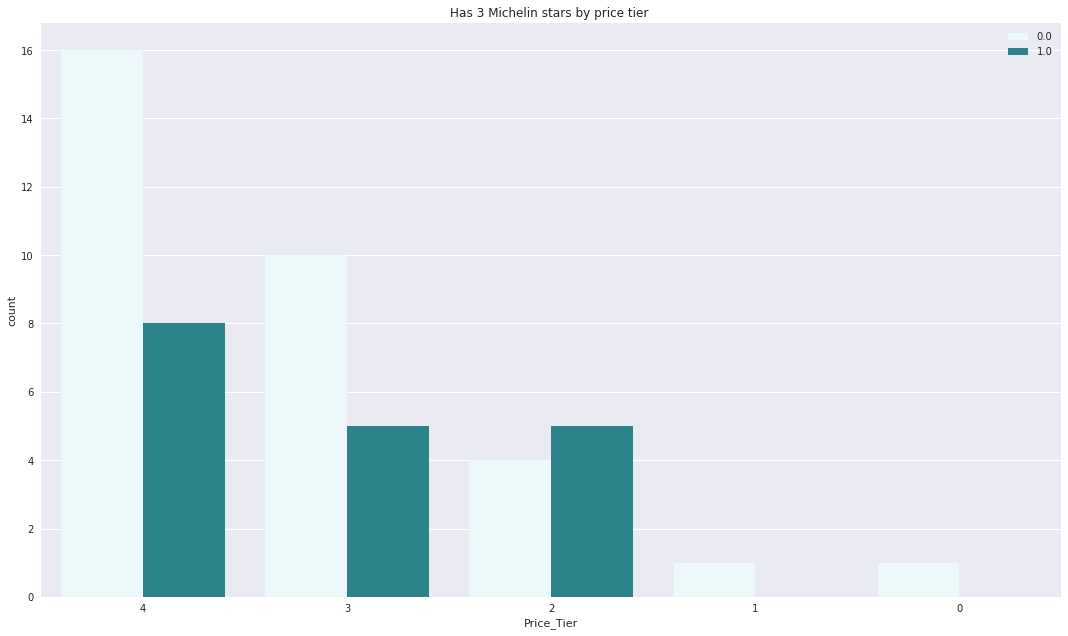

In [86]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="Price_Tier",data=df1,color="#1c9099",hue="Has 3 Michelin stars",order=[4,3,2,1,0])
#plt.xticks(rotation=90)
fig.set_size_inches(15, 9)
plt.title("Has 3 Michelin stars by price tier ")
plt.legend(loc='upper right')
plt.tight_layout()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


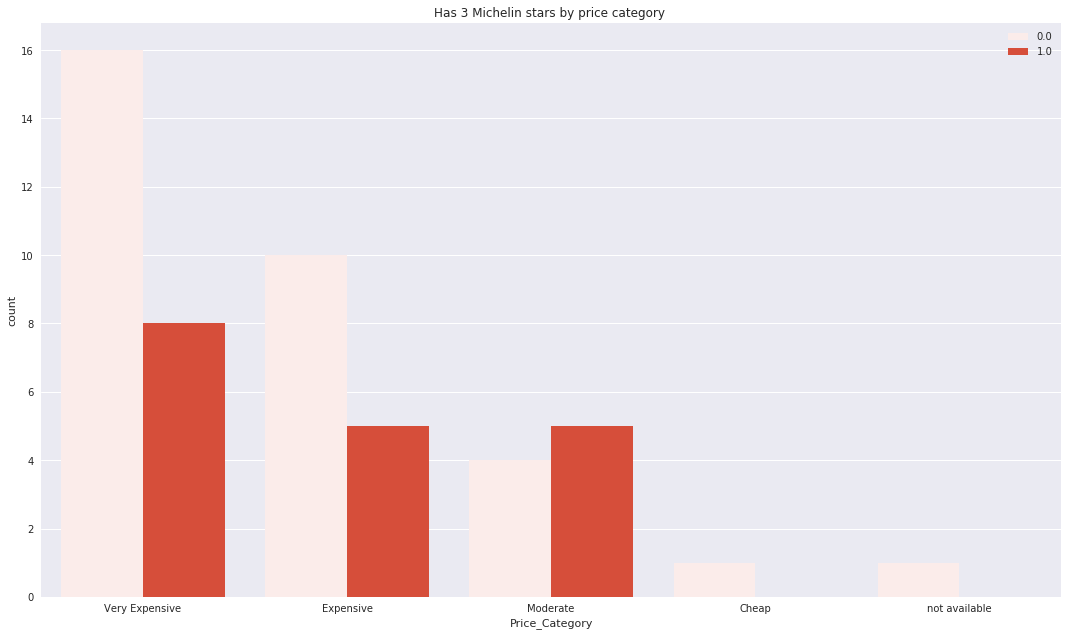

In [87]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="Price_Category",data=df1,color="#f03b20",hue="Has 3 Michelin stars",order=["Very Expensive","Expensive","Moderate","Cheap","not available"])
#plt.xticks(rotation=90)
fig.set_size_inches(15, 9)
plt.title("Has 3 Michelin stars by price category ")
plt.legend(loc='upper right')
plt.tight_layout()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


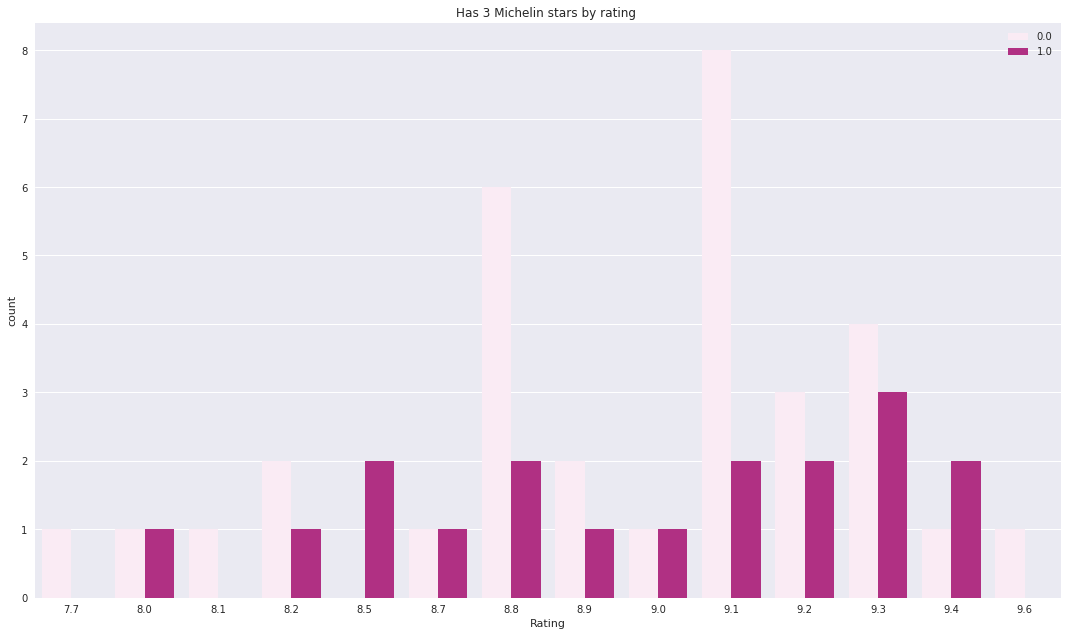

In [88]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="Rating",data=df1,color="#c51b8a",hue="Has 3 Michelin stars")
#plt.xticks(rotation=90)
fig.set_size_inches(15, 9)
plt.title("Has 3 Michelin stars by rating ")
plt.legend(loc='upper right')
plt.tight_layout()

# Maps

In [54]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py_0 conda-forge
    blas:    1.0-mkl               
    branca:  0.3.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge

blas-1.0-mkl.t 100% |################################| Time: 0:00:00   7.30 MB/s
branca-0.3.0-p 100% |################################| Time: 0:00:00 825.33 kB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00 943.06 kB/s
altair-2.2.2-p 100% |################################| Time: 0:00:00   1.19 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  31.99 MB/s


## The World's 50 Best Restaurants map

In [55]:
map_world=folium.Map(location=[0,0],zoom_start=2)
for lat, lng, town, rest, name in zip(df1['Lat'], df1['Lng'], df1['City'], df1['Category'],df1["Name"]):
    label = '{}, {}, {}'.format(name, rest, town)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#228B22',
        fill=True,
        fill_color='#228B22',
        fill_opacity=0.6,
        parse_html=False).add_to(map_world)
map_world

## The World's 50 Best Restaurants map (US)

In [56]:
us_coordinates = [37.0902,-95.7129]

map_us=folium.Map(location=us_coordinates,zoom_start=5)
for lat, lng, town, rest, name in zip(df1['Lat'], df1['Lng'], df1['City'], df1['Category'],df1["Name"]):
    label = '{}, {}, {}'.format(name, rest, town)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#228B22',
        fill=True,
        fill_color='#228B22',
        fill_opacity=0.6,
        parse_html=False).add_to(map_us) 
map_us

## The World's 50 Best Restaurants map (Europe)

In [57]:
eu_coordinates = [54.5260,15.2551]


map_eu=folium.Map(location=eu_coordinates,zoom_start=4)
for lat, lng, town, rest, name in zip(df1['Lat'], df1['Lng'], df1['City'], df1['Category'],df1["Name"]):
    label = '{}, {}, {}'.format(name, rest, town)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#228B22',
        fill=True,
        fill_color='#228B22',
        fill_opacity=0.6,
        parse_html=False).add_to(map_eu) 
map_eu

## The World's 50 Best Restaurants map (Spain)

In [58]:
spain_coordinates = [40.4637,-3.7492]


map_spain=folium.Map(location=spain_coordinates,zoom_start=7)
for lat, lng, town, rest, name in zip(df1['Lat'], df1['Lng'], df1['City'], df1['Category'],df1["Name"]):
    label = '{}, {}, {}'.format(name, rest, town)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='#228B22',
        fill=True,
        fill_color='#228B22',
        fill_opacity=0.6,
        parse_html=False).add_to(map_spain) 
map_spain

## The World's 50 Best Restaurants map (by Has 3 Michelin stars)

In [59]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [60]:
map_world_m=folium.Map(location=[0,0],zoom_start=2)

x = np.arange(2)
ys = [i+x+(i*x)**2 for i in range(2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lng, town, rest, name, star in zip(df1['Lat'], df1['Lng'], df1['City'], df1['Category'],df1["Name"],df1["Has 3 Michelin stars"].astype(int)):
    label = '{}, {}, {},{}'.format(name, rest, town,star)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color=rainbow[star],
        fill=True,
        fill_color=rainbow[star],
        fill_opacity=0.8,
        parse_html=False).add_to(map_world_m)
map_world_m

## The World's 50 Best Restaurants map (by price tier)

In [61]:
map_world_price=folium.Map(location=[0,0],zoom_start=2,tiles='OpenStreetMap')

x = np.arange(5)
ys = [i+x+(i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lng, town, rest, name, price,price_text in zip(df1['Lat'], df1['Lng'], df1['City'], df1['Category'],df1["Name"],df1["Price_Tier"],df1["Price_Category"]):
    label = '{}, {}, {}, {}'.format(name, rest, town,price_text)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color=rainbow[price],
        fill=True,
        fill_color=rainbow[price],
        fill_opacity=0.8,
        parse_html=False).add_to(map_world_price)
map_world_price

## Creating clusters by Rating category

In [62]:
from sklearn.cluster import KMeans

In [63]:
kmeans=KMeans(n_clusters=3)

In [64]:
kmeans.fit(df1["Rating"].reshape(-1, 1))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [65]:
kmeans.labels_

array([0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 1, 0], dtype=int32)

In [66]:
df1["Rating_Clusters"]=pd.Series(kmeans.labels_)

In [76]:
df1.head(10)

,Name,City,Country,Category,Lat,Lng,ID_fsq,Name_fsq,Price_Category,Price_Tier,Rating,Has 3 Michelin stars,Rating_Clusters
0,Osteria Francescana,Modena,Italy,Italian Restaurant,44.644767,10.921629,4c97e0611302b60c90abb1a0,Osteria Francescana,Expensive,3,9.3,1.0,0
1,El Celler de Can Roca,Girona,Spain,Mediterranean Restaurant,41.993311,2.808079,4b7ff0dbf964a520c94530e3,El Celler de Can Roca,Very Expensive,4,9.4,1.0,0
2,Mirazur,Menton,France,French Restaurant,43.785881,7.527904,4bc5afac69369521a5548488,Mirazur,Expensive,3,8.8,0.0,2
3,Eleven Madison Park,New York,USA,New American Restaurant,40.741648,-73.987148,457ebeaaf964a5203f3f1fe3,Eleven Madison Park,Very Expensive,4,9.3,1.0,0
4,Gaggan,Bangkok,Thailand,Indian Restaurant,13.737694,100.542232,4cdbd566df986ea8ac62cc16,Gaggan (กากั้น),Expensive,3,8.8,0.0,2
5,Central,Lima,Peru,Peruvian Restaurant,-12.050563,-77.024586,4ca55f1514c3370429e1b53b,Restaurante Central,Moderate,2,9.2,0.0,0
6,Maido,Lima,Peru,Japanese Restaurant,-12.125485,-77.030572,4ba95f7cf964a520da223ae3,Maido,Very Expensive,4,9.3,0.0,0
7,Arpège,Paris,France,Vegetarian / Vegan Restaurant,48.855712,2.316920,4adcda13f964a520af3621e3,Arpège,Very Expensive,4,8.8,1.0,2
8,Mugaritz,San Sebastian,Spain,Molecular Gastronomy Restaurant,43.322932,-1.983176,4c0955db340720a1809d8493,Mugaritz,Very Expensive,4,8.1,0.0,1
9,Asador Etxebarri,Axpe,Spain,Spanish Restaurant,43.115985,-2.598414,4bb73aa646d4a5939632c7c0,Asador Etxebarri,Very Expensive,4,8.7,0.0,2


### Map of clusters by rating

In [68]:
map_world_rating=folium.Map(location=[0,0],zoom_start=2,tiles='OpenStreetMap')

x = np.arange(3)
ys = [i+x+(i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lng, town, rest, name, rating, rating_cl in zip(df1['Lat'], df1['Lng'], df1['City'], df1['Category'],df1["Name"],df1["Rating"],df1["Rating_Clusters"]):
    label = '{}, {}, {}, {}'.format(name, rest, town, rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color=rainbow[rating_cl],
        fill=True,
        fill_color=rainbow[rating_cl],
        fill_opacity=0.8,
        parse_html=False).add_to(map_world_rating)
map_world_rating

In [74]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0    30
1     7
2    13
dtype: int64

### Restaurants with best rating (9 and above)

In [77]:
df1[df1["Rating_Clusters"]==0]

,Name,City,Country,Category,Lat,Lng,ID_fsq,Name_fsq,Price_Category,Price_Tier,Rating,Has 3 Michelin stars,Rating_Clusters
0,Osteria Francescana,Modena,Italy,Italian Restaurant,44.644767,10.921629,4c97e0611302b60c90abb1a0,Osteria Francescana,Expensive,3,9.3,1.0,0
1,El Celler de Can Roca,Girona,Spain,Mediterranean Restaurant,41.993311,2.808079,4b7ff0dbf964a520c94530e3,El Celler de Can Roca,Very Expensive,4,9.4,1.0,0
3,Eleven Madison Park,New York,USA,New American Restaurant,40.741648,-73.987148,457ebeaaf964a5203f3f1fe3,Eleven Madison Park,Very Expensive,4,9.3,1.0,0
5,Central,Lima,Peru,Peruvian Restaurant,-12.050563,-77.024586,4ca55f1514c3370429e1b53b,Restaurante Central,Moderate,2,9.2,0.0,0
6,Maido,Lima,Peru,Japanese Restaurant,-12.125485,-77.030572,4ba95f7cf964a520da223ae3,Maido,Very Expensive,4,9.3,0.0,0
10,Quintonil,Mexico City,Mexico,Mexican Restaurant,19.430819,-99.191697,4f597585e4b0300584d4c999,Quintonil,Very Expensive,4,9.1,0.0,0
11,Blue Hill at Stone Barns,Pocantico Hills,USA,New American Restaurant,41.104023,-73.828719,460fe943f964a52022451fe3,Blue Hill at Stone Barns,Very Expensive,4,9.3,0.0,0
12,Pujol,Mexico City,Mexico,Mexican Restaurant,19.432378,-99.194808,58f131594acb19754b0e8e86,Pujol,Cheap,1,9.1,0.0,0
13,Steirereck,Vienna,Austria,Austrian Restaurant,48.204371,16.381561,4bbc2af4e5b0d13a63026f7c,Steirereck,Very Expensive,4,9.2,0.0,0
14,White Rabbit,Moscow,Russia,Russian Restaurant,55.747470,37.581295,4da0b24a63b5a35dca56d719,White Rabbit,Expensive,3,9.0,0.0,0


In [81]:
df1[df1["Rating_Clusters"]==0]["Has 3 Michelin stars"].value_counts()

0.0    20
1.0    10
Name: Has 3 Michelin stars, dtype: int64

In [84]:
df1[df1["Rating_Clusters"]==0]["Price_Category"].value_counts()

Very Expensive    16
Expensive          7
Moderate           6
Cheap              1
Name: Price_Category, dtype: int64

### Restaurants with rating (8.5-8.9)

In [79]:
df1[df1["Rating_Clusters"]==2]

,Name,City,Country,Category,Lat,Lng,ID_fsq,Name_fsq,Price_Category,Price_Tier,Rating,Has 3 Michelin stars,Rating_Clusters
2,Mirazur,Menton,France,French Restaurant,43.785881,7.527904,4bc5afac69369521a5548488,Mirazur,Expensive,3,8.8,0.0,2
4,Gaggan,Bangkok,Thailand,Indian Restaurant,13.737694,100.542232,4cdbd566df986ea8ac62cc16,Gaggan (กากั้น),Expensive,3,8.8,0.0,2
7,Arpège,Paris,France,Vegetarian / Vegan Restaurant,48.855712,2.316920,4adcda13f964a520af3621e3,Arpège,Very Expensive,4,8.8,1.0,2
9,Asador Etxebarri,Axpe,Spain,Spanish Restaurant,43.115985,-2.598414,4bb73aa646d4a5939632c7c0,Asador Etxebarri,Very Expensive,4,8.7,0.0,2
22,Le Calandre,Rubano,Italy,Italian Restaurant,45.421770,11.809623,4dae9382b3dcd1a46a0945eb,Le Calandre,Expensive,3,8.6,1.0,2
23,Ultraviolet,Shanghai,China,Restaurant,31.240398,121.485271,4fb23758e4b002c2286b5234,Ultraviolet by Paul Pairet,Moderate,2,8.7,1.0,2
26,Boragó,Santiago,Chile,Molecular Gastronomy Restaurant,-33.404333,-70.598426,4c2eb2ce213c2d7f64c02f5d,Boragó,Very Expensive,4,8.8,0.0,2
30,Arzak,San Sebastian,Spain,Molecular Gastronomy Restaurant,43.321440,-1.949238,4d2f6ddda62d721ec303917d,Arzak,Very Expensive,4,8.9,1.0,2
36,Restaurant Tim Raue,Berlin,Germany,Modern European Restaurant,52.506862,13.391639,4c83978ed34ca143328b3680,Restaurant TIM RAUE,Very Expensive,4,8.8,0.0,2
38,Astrid y Gastón,Lima,Peru,Peruvian Restaurant,-12.096591,-77.034695,52fbaf6b498eb8a688516643,Astrid y Gastón,Expensive,3,8.8,0.0,2


In [82]:
df1[df1["Rating_Clusters"]==2]["Has 3 Michelin stars"].value_counts()

0.0    7
1.0    6
Name: Has 3 Michelin stars, dtype: int64

In [85]:
df1[df1["Rating_Clusters"]==2]["Price_Category"].value_counts()

Very Expensive    6
Expensive         4
Moderate          2
not available     1
Name: Price_Category, dtype: int64

### Restaurants with rating (7.6-8.1)

In [80]:
df1[df1["Rating_Clusters"]==1]

,Name,City,Country,Category,Lat,Lng,ID_fsq,Name_fsq,Price_Category,Price_Tier,Rating,Has 3 Michelin stars,Rating_Clusters
8,Mugaritz,San Sebastian,Spain,Molecular Gastronomy Restaurant,43.322932,-1.983176,4c0955db340720a1809d8493,Mugaritz,Very Expensive,4,8.1,0.0,1
16,Den,Tokyo,Japan,Japanese Restaurant,35.597203,139.667533,4d95cbe7daec224bd65a063e,表参道ワイン食堂 Den,Moderate,2,8.2,0.0,1
27,Odette,Singapore,Singapore,French Restaurant,1.289679,103.851691,5630c035498ed421ed0b2afc,Odette Restaurant,Expensive,3,7.6,0.0,1
28,Alléno Paris au Pavillon Ledoyen,Paris,France,French Restaurant,48.866112,2.316349,4bbe3f2d0ec69c74e8125659,Alléno Paris au Pavillon Ledoyen,Very Expensive,4,8.2,1.0,1
35,Reale,Castel di Sangro,Italy,Italian Restaurant,41.780008,14.094731,4e367fe162e17d29083e493e,Ristorante Reale,Expensive,3,8.0,1.0,1
37,Lyle's,London,UK,English Restaurant,51.523674,-0.076427,534d8c8d498efe2b11ce5473,Lyle's,Expensive,3,8.1,0.0,1
48,Nahm,Bangkok,Thailand,Thai Restaurant,13.723738,100.539343,4c62a460eb82d13a42c905d6,nahm,Expensive,3,8.1,0.0,1


In [83]:
df1[df1["Rating_Clusters"]==1]["Has 3 Michelin stars"].value_counts()

0.0    5
1.0    2
Name: Has 3 Michelin stars, dtype: int64

In [87]:
df1[df1["Rating_Clusters"]==1]["Price_Category"].value_counts()

Expensive         4
Very Expensive    2
Moderate          1
Name: Price_Category, dtype: int64